<a href="https://colab.research.google.com/github/Kanusharma2002/Business-Analysis/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found. Please upload the file or adjust the path.")
    # Example for Google Drive:
    # df = pd.read_csv('/content/drive/MyDrive/Your_Folder/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    exit()

In [4]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [5]:
print("\nInformation about the dataset:")
print(df.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

In [6]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df.drop('customerID', axis=1, inplace=True)

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-9-419782261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [10]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [11]:
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [12]:
if 'Churn' in numerical_features:
    numerical_features.remove('Churn')


In [13]:
print("\nData types after initial cleaning:")
print(df.info())
print("\nUnique values for some categorical features:")
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    print(f"{col}: {df[col].unique()}")


Data types after initial cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  Paymen

/tmp/ipython-input-14-2231578854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


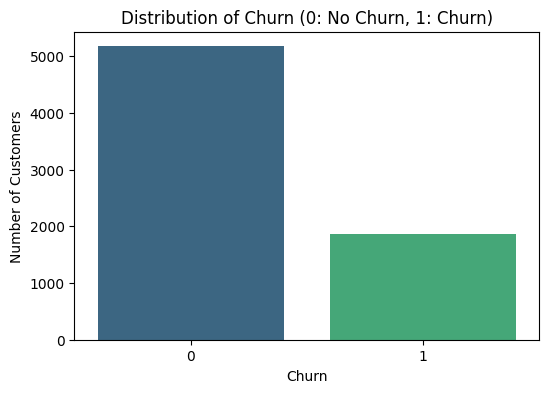

Churn Rate: 26.54%


In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn (0: No Churn, 1: Churn)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()
print(f"Churn Rate: {df['Churn'].mean()*100:.2f}%")

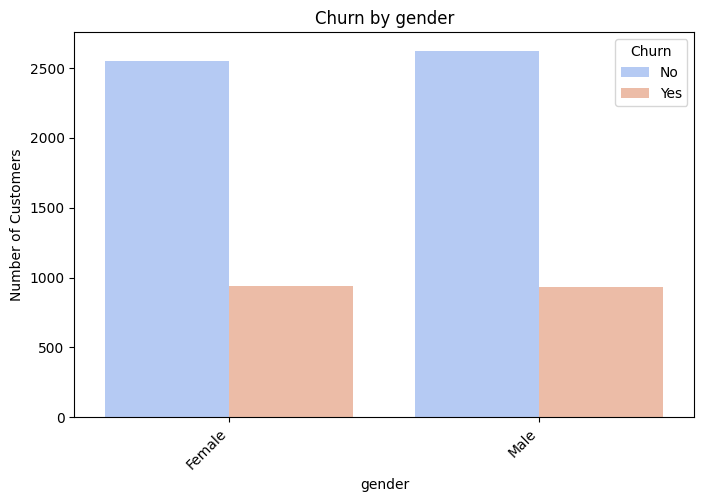

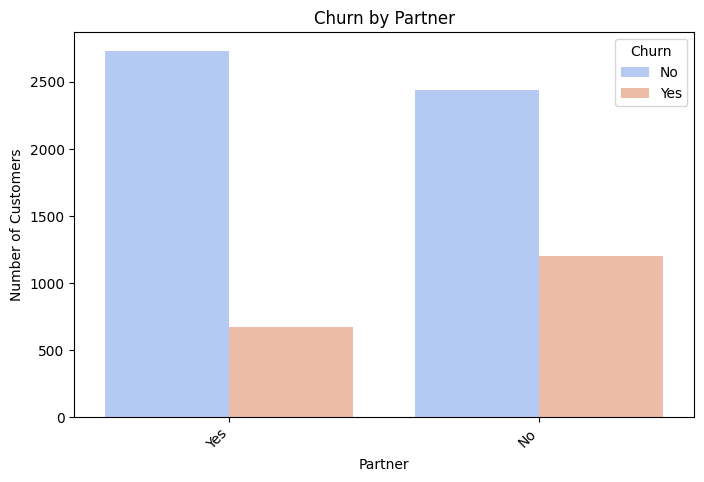

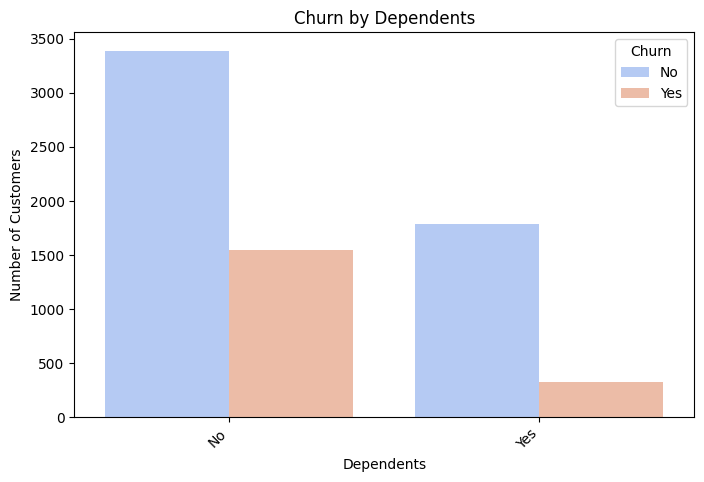

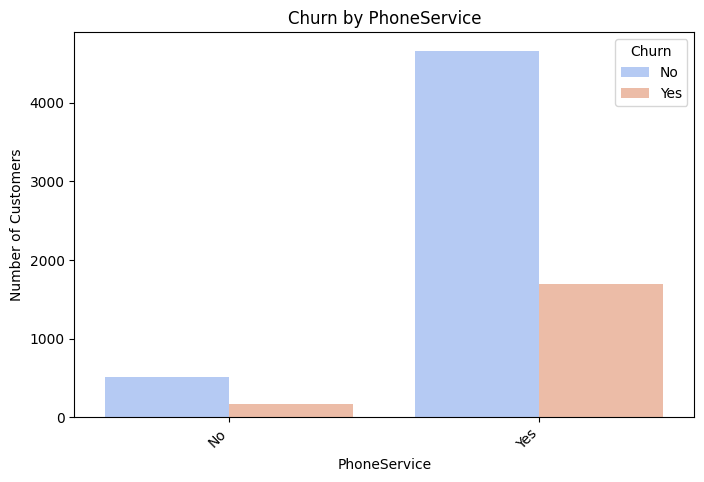

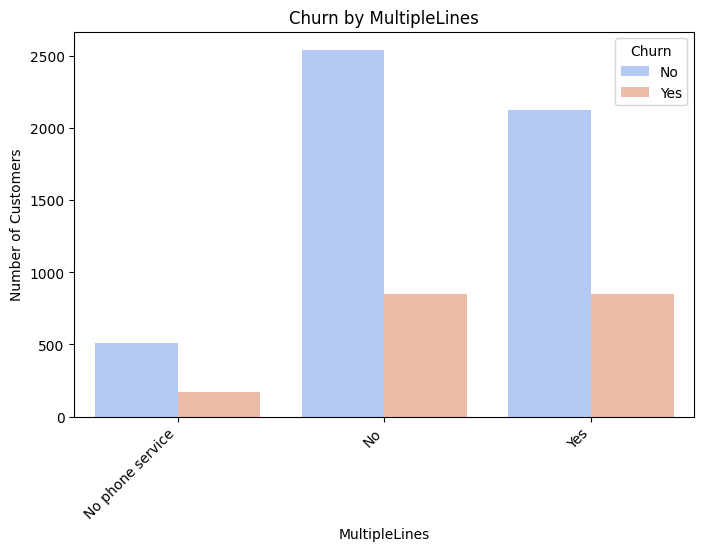

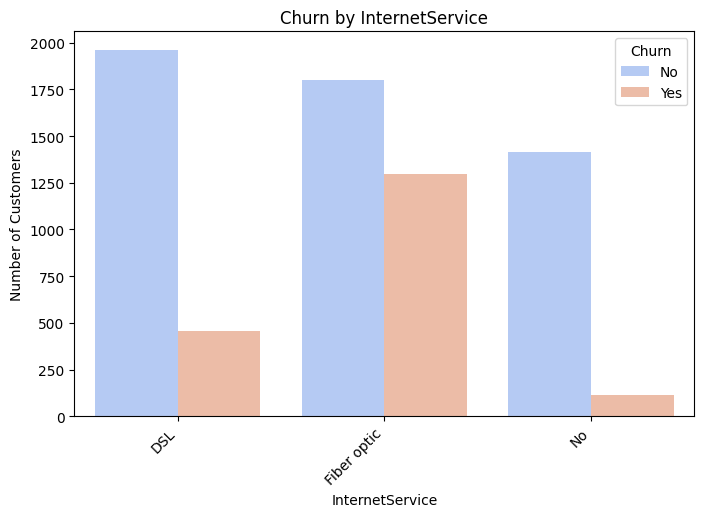

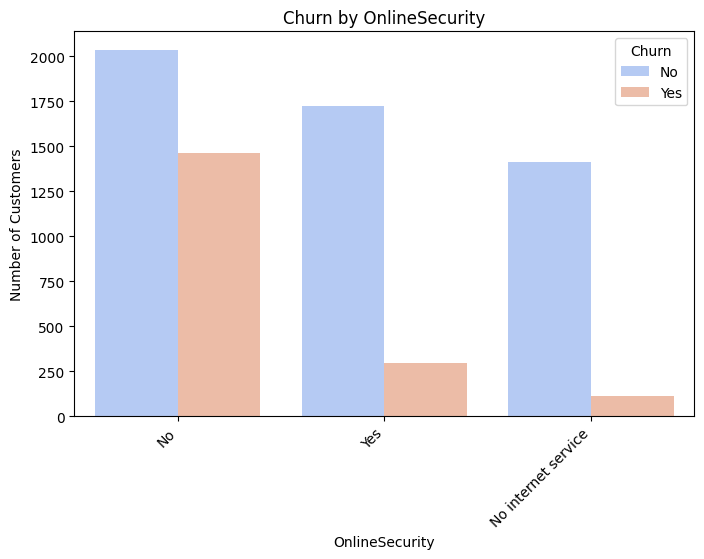

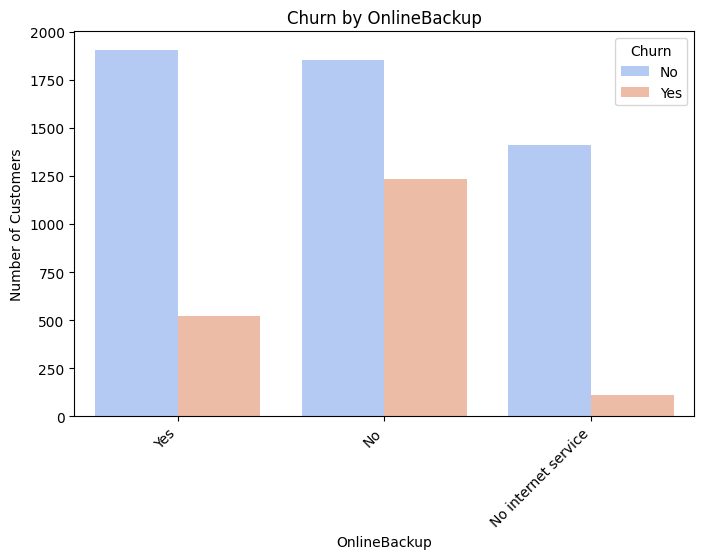

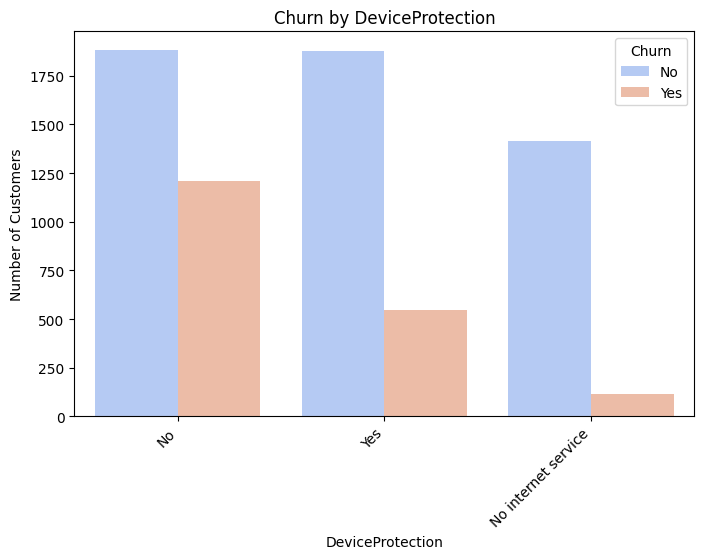

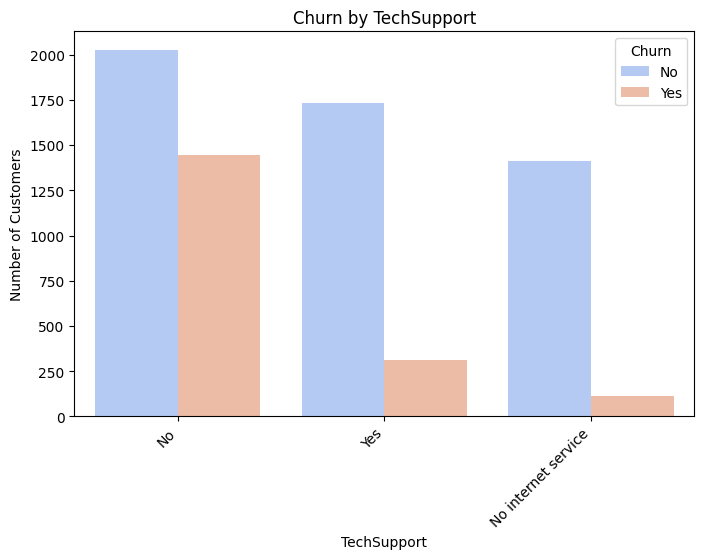

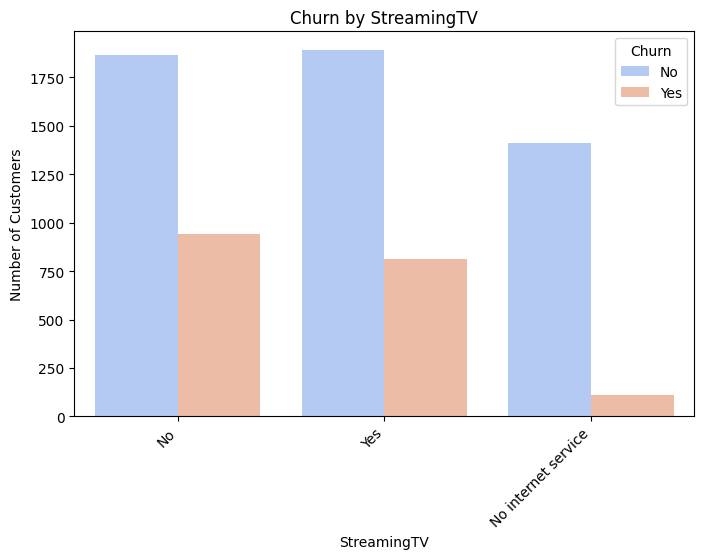

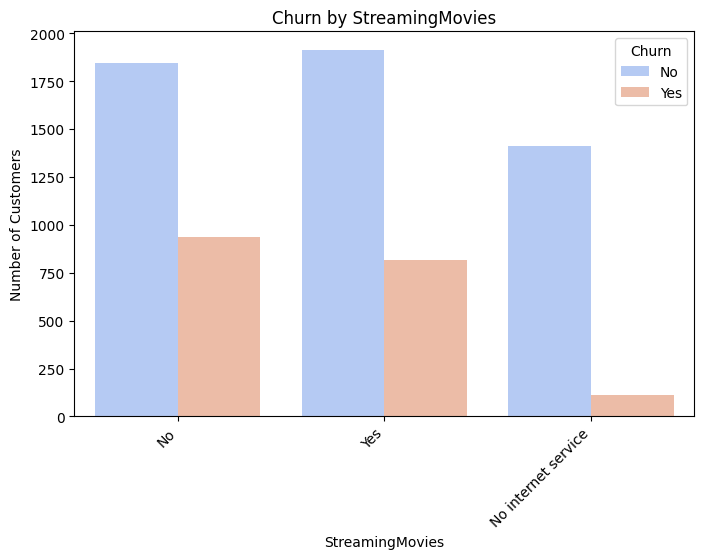

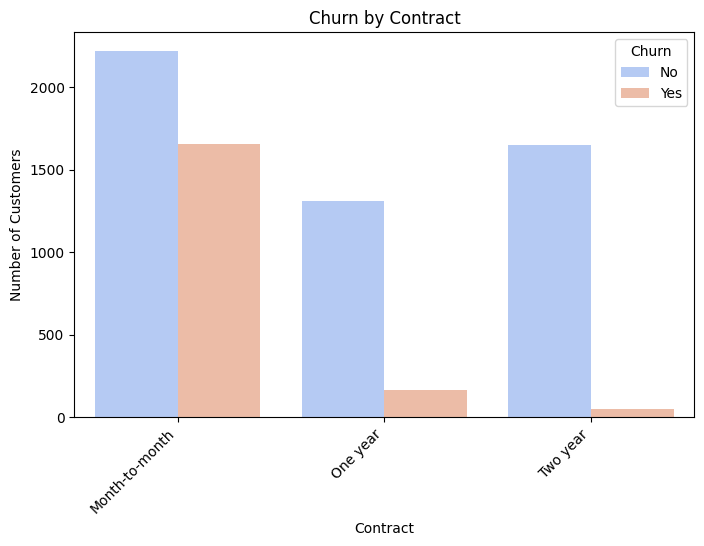

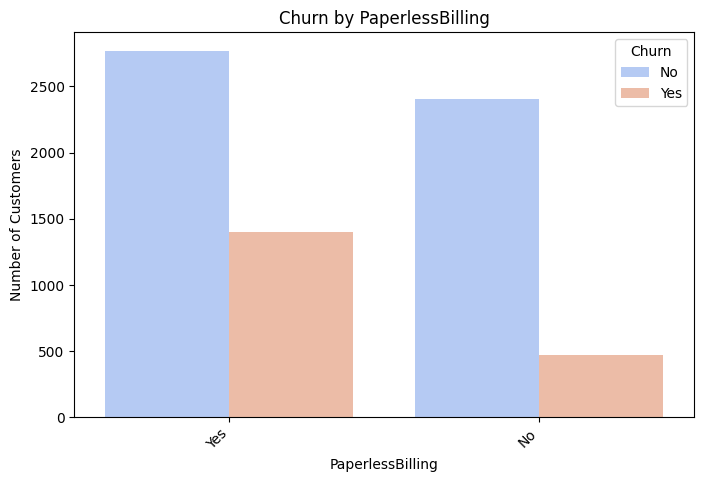

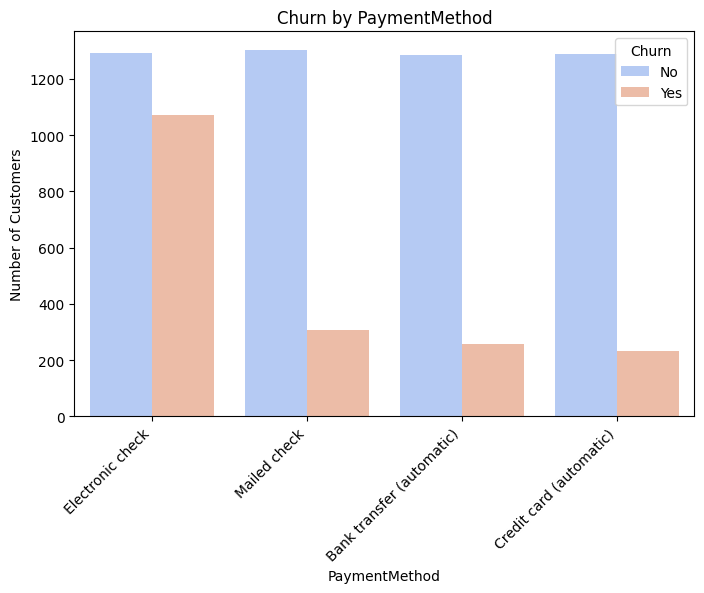

In [15]:
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Churn', data=df, palette='coolwarm')
    plt.title(f'Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

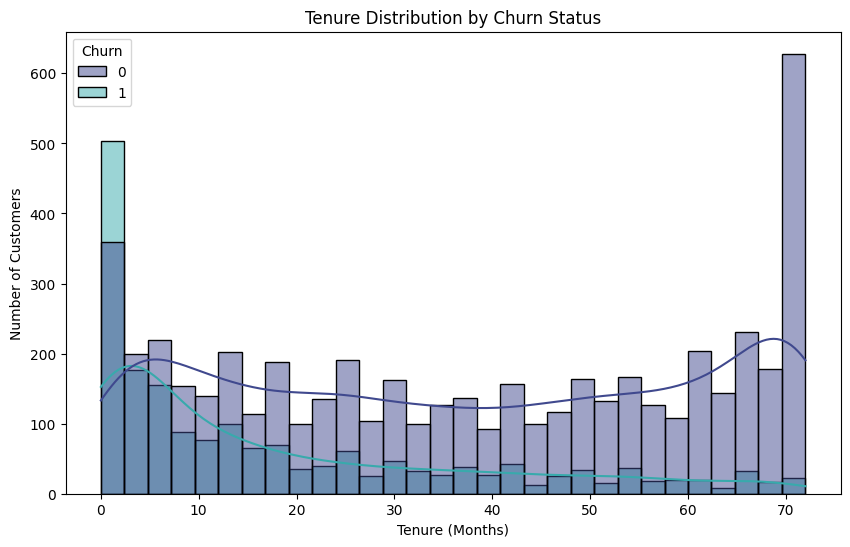

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, palette='mako', bins=30)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

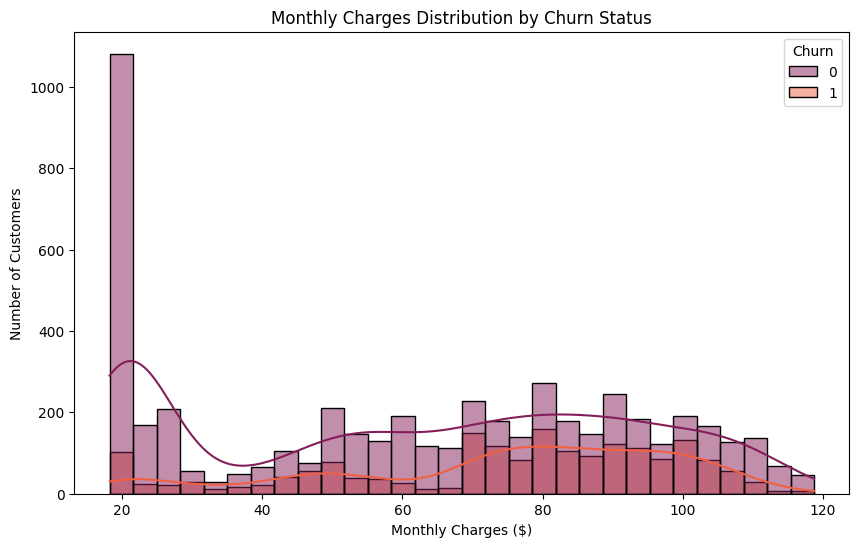

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, palette='rocket', bins=30)
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.show()


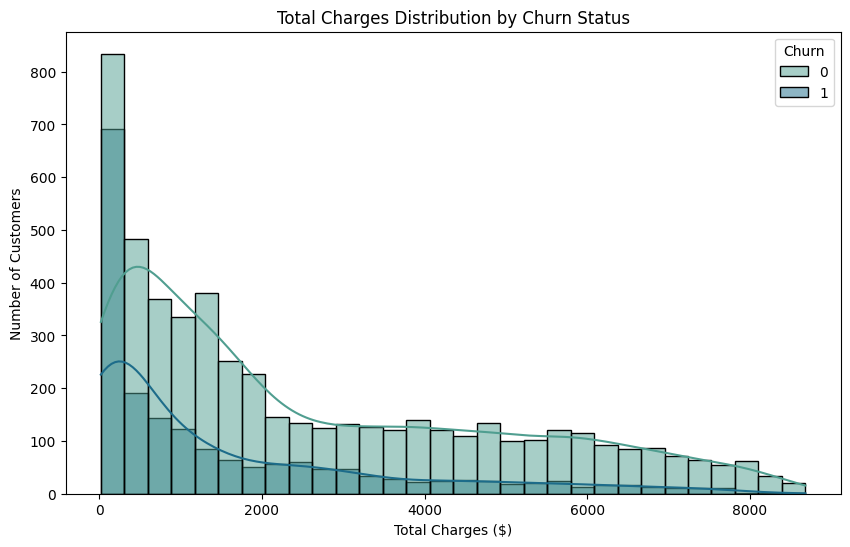

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, palette='crest', bins=30)
plt.title('Total Charges Distribution by Churn Status')
plt.xlabel('Total Charges ($)')
plt.ylabel('Number of Customers')
plt.show()

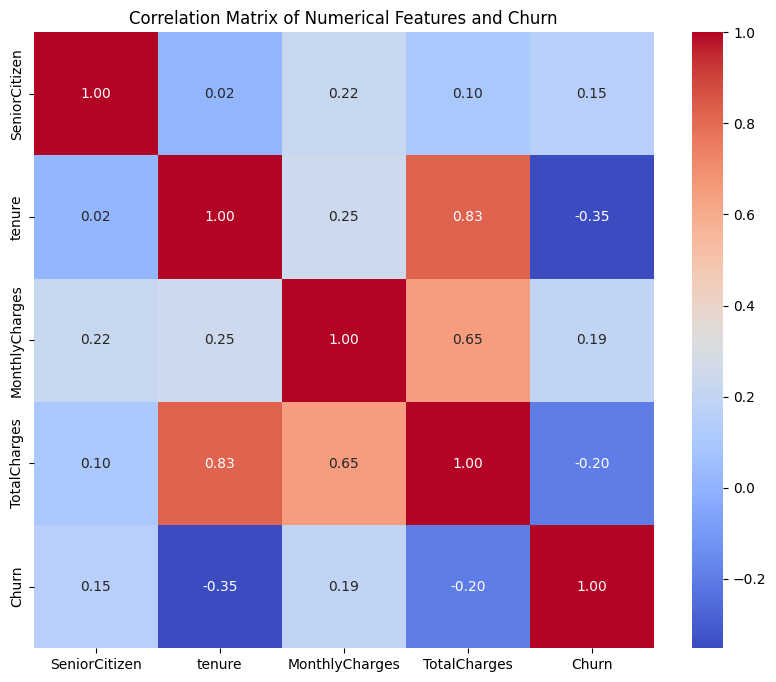

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

In [20]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (5634, 19)
Testing set shape: (1409, 19)


In [22]:
numerical_transformer = StandardScaler()


In [23]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [25]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])


In [26]:
print("\nTraining the Logistic Regression model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")


Training the Logistic Regression model...
Model training complete.


In [27]:
y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1] # Probabilities for the positive class (churn)


In [28]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Evaluation:
Accuracy: 0.8055
Precision: 0.6572
Recall: 0.5588
F1-Score: 0.6040
ROC AUC Score: 0.8419

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



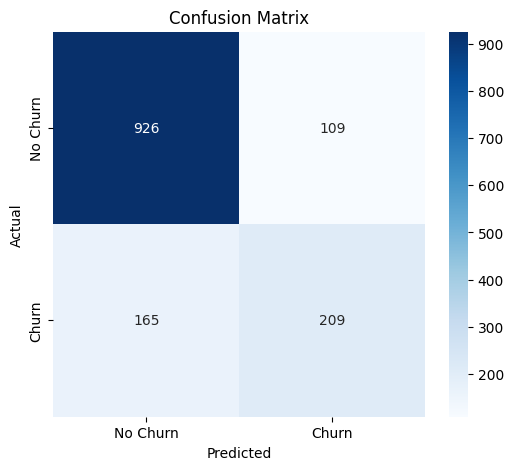

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
if hasattr(model_pipeline.named_steps['classifier'], 'coef_'):
    coefficients = model_pipeline.named_steps['classifier'].coef_[0]


In [42]:
    ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(ohe_feature_names)

    feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
    feature_importance_df['Absolute_Coefficient'] = numpy.abs(feature_importance_df['Coefficient'])
    feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

    print("\nTop Feature Importances (Absolute Coefficients from Logistic Regression):")
    print(feature_importance_df.head(15))

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance_df.head(15), palette='magma')
    plt.title('Top 15 Feature Importances (Absolute Coefficients)')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

NameError: name 'numpy' is not defined

In [31]:
print("\n--- Churn Metrics and Segmentation Summary ---")



--- Churn Metrics and Segmentation Summary ---


In [34]:
overall_churn_rate = df['Churn'].mean() * 100
print(f"\nOverall Churn Rate: {overall_churn_rate:.2f}%")


Overall Churn Rate: 26.54%



Churn Rate by Contract Type:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


/tmp/ipython-input-35-1795929172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_contract.index, y=churn_by_contract, palette='viridis')


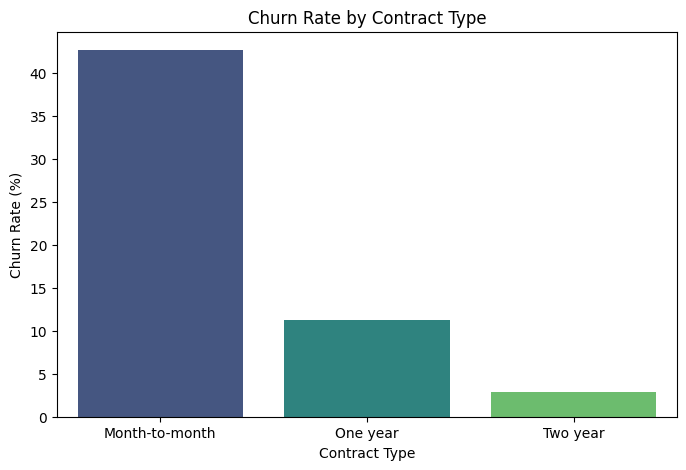

In [35]:
print("\nChurn Rate by Contract Type:")
churn_by_contract = df.groupby('Contract')['Churn'].mean() * 100
print(churn_by_contract.sort_values(ascending=False))
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()


Churn Rate by Internet Service:
InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: Churn, dtype: float64


/tmp/ipython-input-36-1904619720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_internet.index, y=churn_by_internet, palette='plasma')


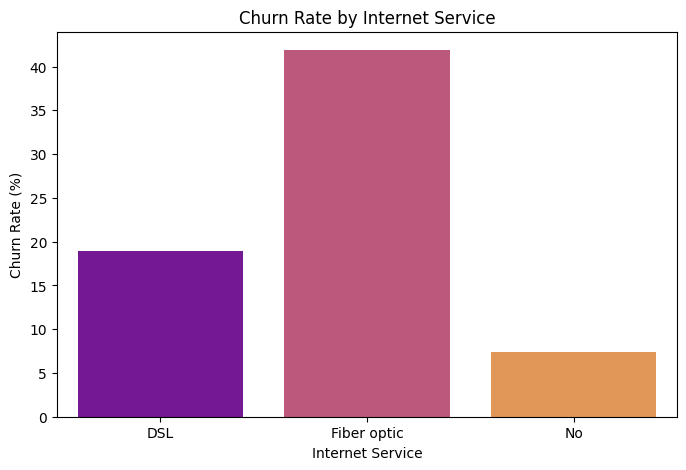

In [36]:
print("\nChurn Rate by Internet Service:")
churn_by_internet = df.groupby('InternetService')['Churn'].mean() * 100
print(churn_by_internet.sort_values(ascending=False))
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_internet.index, y=churn_by_internet, palette='plasma')
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate (%)')
plt.show()

In [37]:
df['Approx_CLTV'] = df['MonthlyCharges'] * df['tenure']
print("\nApproximate CLTV by Churn Status (Mean):")
print(df.groupby('Churn')['Approx_CLTV'].mean())



Approximate CLTV by Churn Status (Mean):
Churn
0    2549.770883
1    1531.608828
Name: Approx_CLTV, dtype: float64


In [38]:
df_test_with_pred = X_test.copy()
df_test_with_pred['Actual_Churn'] = y_test
df_test_with_pred['Predicted_Churn_Prob'] = y_prob
df_test_with_pred['Predicted_Churn'] = y_pred

In [39]:
def assign_risk_segment(prob):
    if prob >= 0.75:
        return 'High Risk'
    elif prob >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df_test_with_pred['Risk_Segment'] = df_test_with_pred['Predicted_Churn_Prob'].apply(assign_risk_segment)

print("\nDistribution of customers across churn risk segments (based on test set):")
print(df_test_with_pred['Risk_Segment'].value_counts(normalize=True)*100)


Distribution of customers across churn risk segments (based on test set):
Risk_Segment
Low Risk       68.843151
Medium Risk    28.388928
High Risk       2.767921
Name: proportion, dtype: float64


In [40]:
print("\nAverage tenure for High Risk Churn customers:")
high_risk_tenure = df_test_with_pred[df_test_with_pred['Risk_Segment'] == 'High Risk']['tenure'].mean()
print(f"{high_risk_tenure:.2f} months")


Average tenure for High Risk Churn customers:
4.51 months


In [41]:
print("\nMost common Payment Method for High Risk Churn customers:")
print(df_test_with_pred[df_test_with_pred['Risk_Segment'] == 'High Risk']['PaymentMethod'].value_counts().head(3))


Most common Payment Method for High Risk Churn customers:
PaymentMethod
Electronic check    39
Name: count, dtype: int64


# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes into the existing code. Otherwise, diagnose the error.

## Analyze feature importances

### Subtask:
Interpret the feature importances from the logistic regression model to identify the most influential factors for churn.


**Reasoning**:
The previous code failed because numpy was not imported. I need to import numpy and then re-run the code to calculate and display the feature importances from the logistic regression model.




Top Feature Importances (Absolute Coefficients from Logistic Regression):
                                 Feature  Coefficient  Absolute_Coefficient
1                                 tenure    -1.236074              1.236074
38                     Contract_Two year    -0.786038              0.786038
15                   InternetService_DSL    -0.652281              0.652281
16           InternetService_Fiber optic     0.608379              0.608379
36               Contract_Month-to-month     0.567871              0.567871
2                         MonthlyCharges    -0.556017              0.556017
3                           TotalCharges     0.511672              0.511672
39                   PaperlessBilling_No    -0.360946              0.360946
34   StreamingMovies_No internet service    -0.305945              0.305945
17                    InternetService_No    -0.305945              0.305945
19    OnlineSecurity_No internet service    -0.305945              0.305945
28       Tech

/tmp/ipython-input-43-4196522830.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance_df.head(15), palette='magma')


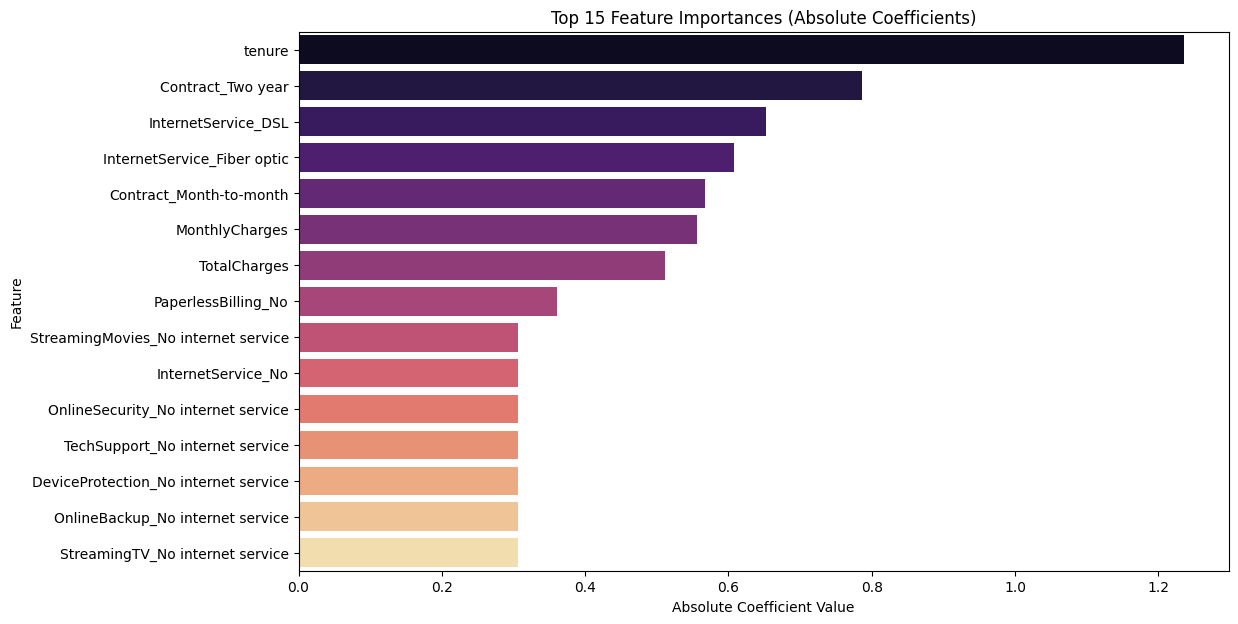

In [43]:
import numpy as np

if hasattr(model_pipeline.named_steps['classifier'], 'coef_'):
    coefficients = model_pipeline.named_steps['classifier'].coef_[0]

    ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(ohe_feature_names)

    feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
    feature_importance_df['Absolute_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
    feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

    print("\nTop Feature Importances (Absolute Coefficients from Logistic Regression):")
    print(feature_importance_df.head(15))

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance_df.head(15), palette='magma')
    plt.title('Top 15 Feature Importances (Absolute Coefficients)')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

## Summarize segmentation analysis

### Subtask:
Summarize the findings from the churn risk segmentation to understand the characteristics of customers in different risk groups.


**Reasoning**:
Summarize the findings from the churn risk segmentation analysis based on the provided outputs.



In [44]:
print("\n--- Churn Risk Segmentation Summary ---")

# 2. Describe the proportion of customers falling into each risk segment
print("\nProportion of customers in each risk segment (based on test set):")
print(df_test_with_pred['Risk_Segment'].value_counts(normalize=True)*100)

# 3. Summarize the key characteristics of the high-risk churn customers
print("\nKey characteristics of High Risk Churn customers:")
print(f"- Average tenure: {high_risk_tenure:.2f} months")
print("- Most common Payment Method:")
print(df_test_with_pred[df_test_with_pred['Risk_Segment'] == 'High Risk']['PaymentMethod'].value_counts().head(3))

# 4. Briefly discuss what these characteristics might imply
print("\nImplications of High Risk customer characteristics:")
print("High-risk churn customers tend to have very short tenures (average ~4.5 months), suggesting that issues or dissatisfaction leading to churn occur early in their customer journey.")
print("The prevalence of 'Electronic check' as the most common payment method among this group might indicate that customers using this method are less committed or have a less stable relationship with the company compared to those using automatic payment methods.")


--- Churn Risk Segmentation Summary ---

Proportion of customers in each risk segment (based on test set):
Risk_Segment
Low Risk       68.843151
Medium Risk    28.388928
High Risk       2.767921
Name: proportion, dtype: float64

Key characteristics of High Risk Churn customers:
- Average tenure: 4.51 months
- Most common Payment Method:
PaymentMethod
Electronic check    39
Name: count, dtype: int64

Implications of High Risk customer characteristics:
High-risk churn customers tend to have very short tenures (average ~4.5 months), suggesting that issues or dissatisfaction leading to churn occur early in their customer journey.
The prevalence of 'Electronic check' as the most common payment method among this group might indicate that customers using this method are less committed or have a less stable relationship with the company compared to those using automatic payment methods.


## Develop actionable insights and recommendations

### Subtask:
Based on the model results and segmentation analysis, formulate specific recommendations for the telecom company to reduce churn.


**Reasoning**:
Synthesize the findings from the feature importance analysis and churn risk segmentation to formulate actionable recommendations for churn reduction, and then finish the task.



In [45]:
print("\n--- Recommendations for Churn Reduction ---")

print("\nBased on the analysis of feature importances and churn risk segmentation, the following recommendations are proposed:")

print("\n1. Target High-Risk Customers with Early Intervention Programs:")
print(f"- The analysis shows that high-risk customers have a very low average tenure ({high_risk_tenure:.2f} months) and frequently use Electronic Check as a payment method.")
print("- Implement early intervention programs specifically for new customers, especially those using Electronic Check or exhibiting other high-risk indicators (e.g., Fiber Optic internet service, Month-to-month contracts).")
print("- These programs could include proactive outreach, enhanced onboarding support, and addressing potential service issues promptly.")
print("- Consider offering incentives for high-risk customers to switch to automated payment methods or longer-term contracts after a positive initial experience.")

print("\n2. Address Issues Related to Fiber Optic Internet Service:")
print("- Fiber Optic internet service was identified as a strong positive predictor of churn.")
print("- Investigate potential issues or sources of dissatisfaction among Fiber Optic customers (e.g., reliability, customer support, pricing relative to perceived value).")
print("- Improve the quality of service and support for Fiber Optic customers to reduce churn in this segment.")

print("\n3. Encourage Longer-Term Contracts:")
print("- Month-to-month contracts are strongly associated with higher churn, while two-year contracts are associated with lower churn.")
print("- Develop attractive incentives (e.g., discounts, perks) for customers to switch to one-year or two-year contracts, particularly for those currently on month-to-month plans.")
print("- Clearly communicate the benefits and value of longer-term commitments.")

print("\n4. Review Pricing and Value Proposition for High Monthly Charges and Total Charges:")
print("- While monthly charges had a counter-intuitive negative correlation with churn in the logistic regression model, Total Charges showed a positive correlation.")
print("- This might suggest that customers with high overall spending who eventually churn could be doing so due to perceived lack of value or accumulated dissatisfaction over time.")
print("- Review pricing strategies, especially for high-spending customers, and ensure the value proposition is clear and competitive.")
print("- Implement loyalty programs or exclusive offers for long-term, high-value customers to enhance retention.")

print("\n5. Promote Paperless Billing:")
print("- Not having paperless billing was associated with lower churn.")
print("- This is a less impactful factor compared to others, but promoting paperless billing could still contribute to customer retention, possibly by indicating a higher level of engagement or comfort with digital interactions.")

print("\n6. Leverage Insights from Internet Service and Related Features:")
print("- The 'No internet service' group has a lower churn rate, suggesting that customers without internet service are less likely to churn from the core phone service.")
print("- Focus retention efforts primarily on customers with internet services, especially Fiber Optic.")
print("- Ensure seamless integration and support across different service bundles (phone and internet).")

print("\n--- Limitations and Next Steps ---")
print("\nLimitations of the current analysis:")
print("- The logistic regression model provides insights into linear relationships and feature importance based on coefficients, but may not capture complex non-linear interactions.")
print("- The segmentation is based on predicted churn probability from this specific model and may not fully represent all nuances of customer behavior.")

print("\nPotential Next Steps:")
print("- Explore other machine learning models (e.g., Random Forest, Gradient Boosting) to compare performance and feature importance.")
print("- Conduct a deeper dive into customer feedback and reasons for churn, especially for the high-risk group and Fiber Optic customers.")
print("- Analyze the profitability of different customer segments to prioritize retention efforts.")
print("- Implement A/B testing for proposed interventions to measure their effectiveness.")
print("- Continuously monitor churn rates and model performance over time.")



--- Recommendations for Churn Reduction ---

Based on the analysis of feature importances and churn risk segmentation, the following recommendations are proposed:

1. Target High-Risk Customers with Early Intervention Programs:
- The analysis shows that high-risk customers have a very low average tenure (4.51 months) and frequently use Electronic Check as a payment method.
- Implement early intervention programs specifically for new customers, especially those using Electronic Check or exhibiting other high-risk indicators (e.g., Fiber Optic internet service, Month-to-month contracts).
- These programs could include proactive outreach, enhanced onboarding support, and addressing potential service issues promptly.
- Consider offering incentives for high-risk customers to switch to automated payment methods or longer-term contracts after a positive initial experience.

2. Address Issues Related to Fiber Optic Internet Service:
- Fiber Optic internet service was identified as a strong po

## Summary:

### Data Analysis Key Findings

*   The logistic regression model identified `tenure`, `Contract_Two year`, `InternetService_DSL`, `InternetService_Fiber optic`, and `Contract_Month-to-month` as the most influential factors for churn based on the absolute values of their coefficients.
*   Longer tenure and two-year contracts are strongly associated with a decreased probability of churn, while month-to-month contracts and fiber optic internet service are associated with an increased probability of churn.
*   The churn risk segmentation revealed that approximately 2.77% of customers in the test set are classified as "High Risk".
*   High-risk churn customers have a significantly shorter average tenure (around 4.51 months) and predominantly use "Electronic check" as their payment method.
*   Customers without internet service appear less likely to churn from the core phone service.

### Insights or Next Steps

*   Focus on early intervention programs for new customers, particularly those using Electronic Check or subscribing to Fiber Optic internet or month-to-month contracts, as they are identified as high-risk.
*   Investigate and address potential issues specifically related to Fiber Optic internet service quality or customer satisfaction to reduce churn in this segment.
